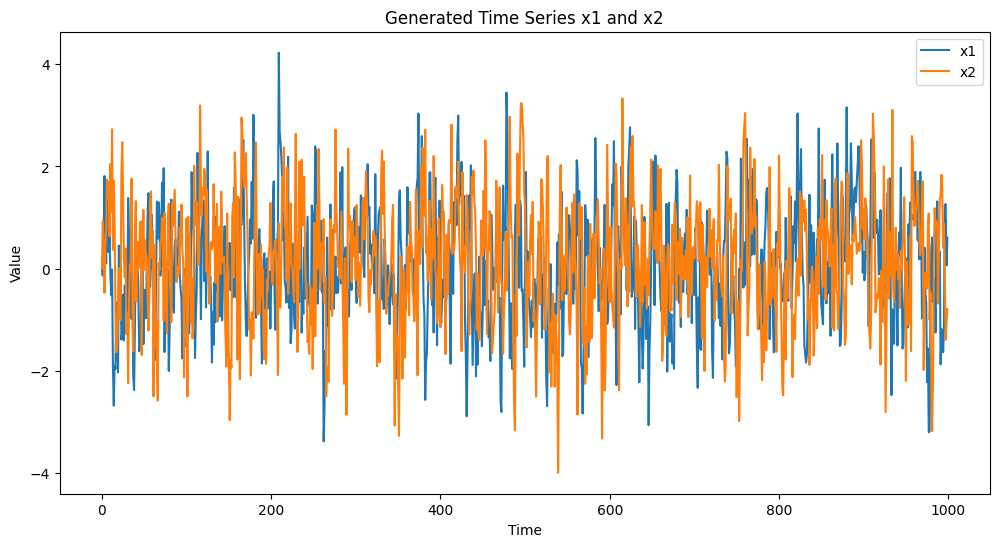

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters
T = 1000  # Length of the time series
phi1 = 0.5  # Autoregressive coefficient for x1
phi2 = 0.4  # Autoregressive coefficient for x2
theta = 0.3  # Coefficient for the influence of x1 lagged by 3 on x2

# Initialize arrays to store the time series
x1 = np.zeros(T)
x2 = np.zeros(T)

# Generate white noise terms
e1 = np.random.normal(0, 1, T)  # Noise for x1
e2 = np.random.normal(0, 1, T)  # Noise for x2

# Generate x1 (AR(1) process)
for t in range(1, T):
    x1[t] = phi1 * x1[t - 1] + e1[t]

# Generate x2 (depends on its own past and x1's past lagged by 3)
for t in range(1, T):
    if t >= 3:
        x2[t] = phi2 * x2[t - 1] + theta * x1[t - 3] + e2[t]
    else:
        x2[t] = phi2 * x2[t - 1] + e2[t]

# Plot the generated time series
plt.figure(figsize=(12, 6))
plt.plot(x1, label='x1')
plt.plot(x2, label='x2')
plt.title('Generated Time Series x1 and x2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


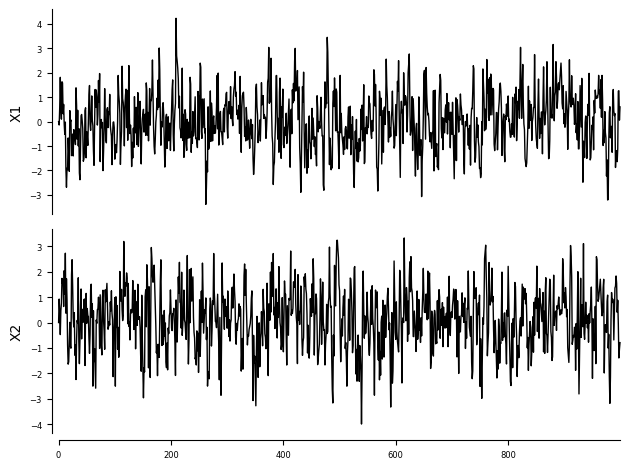

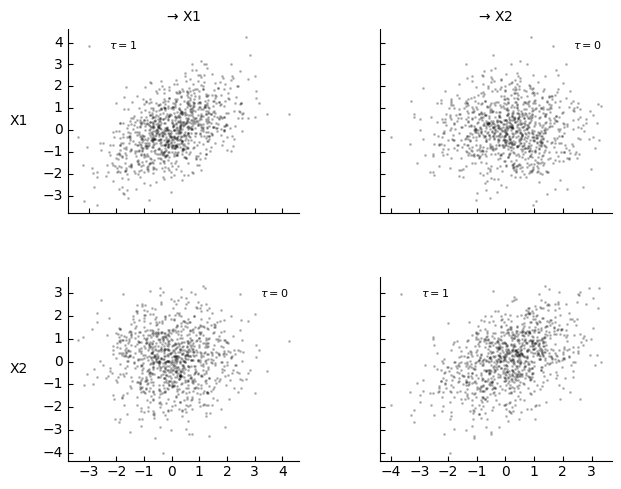


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


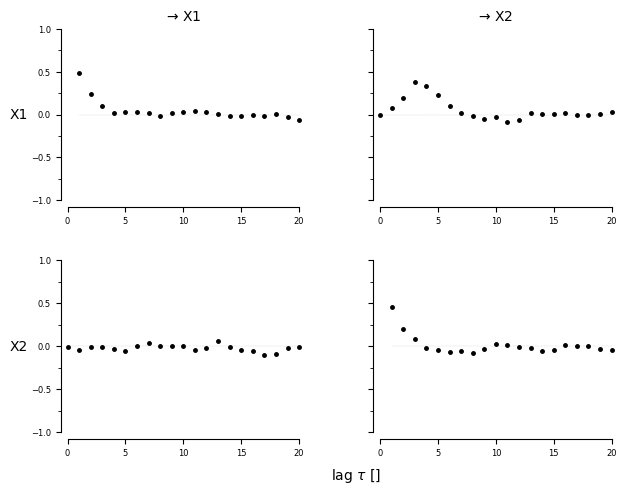

In [6]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI



# put x1 and x2 as columns in a ndarray called data
data = np.column_stack((x1, x2))

var_names = [r'X1', r'X2']
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)


tp.plot_timeseries(dataframe); plt.show()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 2
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X1 has 1 link(s):
    [pc_alpha = 0.05]
        (X1 -2): max_pval = 0.00000, |min_val| =  0.216

    Variable X2 has 2 link(s):
    [pc_alpha = 0.05]
        (X1 -3): max_pval = 0.00000, |min_val| =  0.384
        (X2 -2): max_pval = 0.00000, |min_val| =  0.166

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 2
tau_max = 3
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X1 has 1 link(s):
        (X1 -2): pval = 0.00000 | val =  0.246

    Variable X2 has 2 link(s):
        (X1 -3): pval = 0.00000 | val =  0.361
        (X2 -2): pval = 0.00000 | val =  0.152


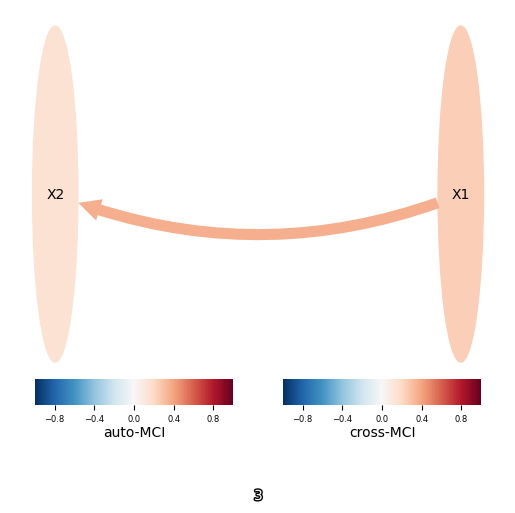

In [7]:

pcmci.verbosity = 1
tau_min=2
tau_max=3
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 2
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X1 has 1 link(s):
    [pc_alpha = 0.05]
        (X1 -2): max_pval = 0.00000, |min_val| =  0.216

    Variable X2 has 2 link(s):
    [pc_alpha = 0.05]
        (X1 -3): max_pval = 0.00000, |min_val| =  0.384
        (X2 -2): max_pval = 0.00000, |min_val| =  0.166

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 2
tau_max = 3
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X1 has 1 link(s):
        (X1 -2): pval = 0.00000 | val =  0.246

    Variable X2 has 2 link(s):
        (X1 -3): pval = 0.00000 | val =  0.361
        (X2 -2): pval = 0.00000 | val =  0.152


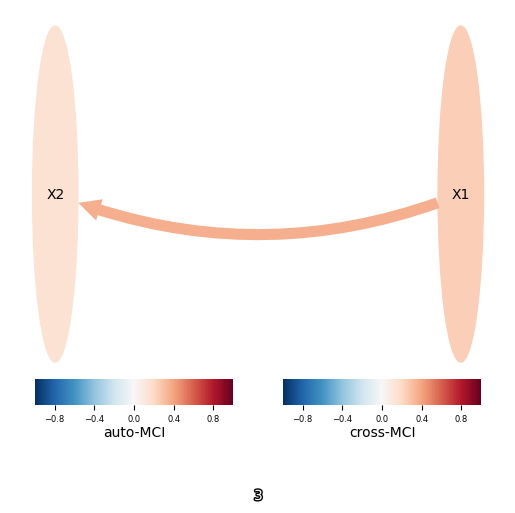

    Variable X1 has 1 link(s):
        (X1 -2): pval = 0.00000 | val =  0.246
    Variable X2 has 2 link(s):
        (X1 -3): pval = 0.00000 | val =  0.361
        (X2 -2): pval = 0.00000 | val =  0.152
''
'## Significant links at alpha = 0.05:'
'    Variable X1 has 1 link(s):'
target var: X1
'        (X1 -2): pval = 0.00000 | val =  0.246'
Cause match found: <re.Match object; span=(8, 15), match='(X1 -2)'>
Val match found: <re.Match object; span=(32, 46), match='| val =  0.246'>
['X1', '-2']
Cause name: X1 -2


ValueError: 'X1 -2' is not in list

In [8]:


pcmci.verbosity = 1
tau_min=2
tau_max=3
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()

from toolbox import post_processing_functions as ppf
import importlib
importlib.reload(ppf)


N = results['p_matrix'].shape[0]
# var_names = var_names


results_text=ppf.print_significant_links(N, var_names, p_matrix=results['p_matrix'],
                                 val_matrix=results['val_matrix'],
                                 alpha_level=0.05)

causal_links = ppf.parse_results_to_dict(results_text, var_names)
causal_links
